In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import yfinance

Récupérer l'histoire de l'action Apple (APPL) grâce à l'API en ligne de Yahoo Finance. En backup, le fichier apple_history.csv est aussi fourni dans le dépôt Github.

In [2]:
apple = yfinance.Ticker("AAPL")
apple_df = apple.history(start="2010-01-01", end="2025-01-01")
print(apple_df.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-01-04 00:00:00-05:00  6.414465  6.446623  6.382908  6.431897  493729600   
2010-01-05 00:00:00-05:00  6.449629  6.479382  6.409055  6.443017  601904800   
2010-01-06 00:00:00-05:00  6.443016  6.468562  6.333919  6.340531  552160000   
2010-01-07 00:00:00-05:00  6.363974  6.371488  6.282828  6.328811  477131200   
2010-01-08 00:00:00-05:00  6.320395  6.371488  6.283129  6.370886  447610800   

                           Dividends  Stock Splits  
Date                                                
2010-01-04 00:00:00-05:00        0.0           0.0  
2010-01-05 00:00:00-05:00        0.0           0.0  
2010-01-06 00:00:00-05:00        0.0           0.0  
2010-01-07 00:00:00-05:00        0.0           0.0  
2010-01-08 00:00:00-05:00        0.0           0.0  


In [3]:
# Alternative : chargement du fichier apple_history.csv

Explorer ce fichier. Y a-t-il des valeurs manquantes ?

In [4]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2010-01-04 00:00:00-05:00 to 2024-12-31 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3774 non-null   float64
 1   High          3774 non-null   float64
 2   Low           3774 non-null   float64
 3   Close         3774 non-null   float64
 4   Volume        3774 non-null   int64  
 5   Dividends     3774 non-null   float64
 6   Stock Splits  3774 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 235.9 KB


In [5]:
# Aucune valeur manquante

In [6]:
apple_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3774.000000,3774.000000,3774.000000,3774.000000,3.774000e+03,3774.000000,3774.000000
mean,67.377155,68.086941,66.709768,67.433262,2.299200e+08,0.002316,0.002915
std,65.438023,66.125667,64.819099,65.516757,2.180726e+08,0.020785,0.131222
min,5.781525,5.890622,5.717809,5.771908,2.323470e+07,0.000000,0.000000
25%,17.442396,17.622332,17.293330,17.438816,8.492275e+07,0.000000,0.000000
50%,35.308424,35.681947,34.917545,35.277466,1.403920e+08,0.000000,0.000000
75%,126.173640,127.831544,124.664347,126.743410,3.081386e+08,0.000000,0.000000
max,257.568678,259.474086,257.010028,258.396667,1.880998e+09,0.250000,7.000000


Visualiser l'historique des prix de clôture sur un graphe simple.

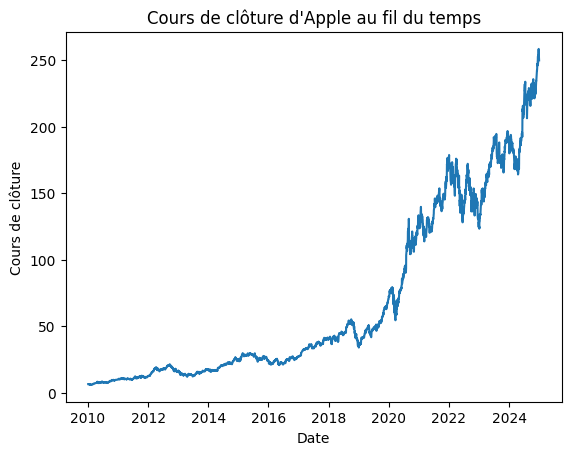

In [7]:
plt.plot(apple_df.index, apple_df["Close"])
plt.title("Cours de clôture d'Apple au fil du temps")
plt.xlabel("Date")
plt.ylabel("Cours de clôture")
plt.show()

Calculer la variation relative du cours de clôture d'une journée à l'autre. Pour cela, chercher dans la documentation ou sur internet une méthode des Series de pandas réalisant directement ce calcul.

In [8]:
apple_df["variation"] = apple_df["Close"].pct_change().fillna(0)

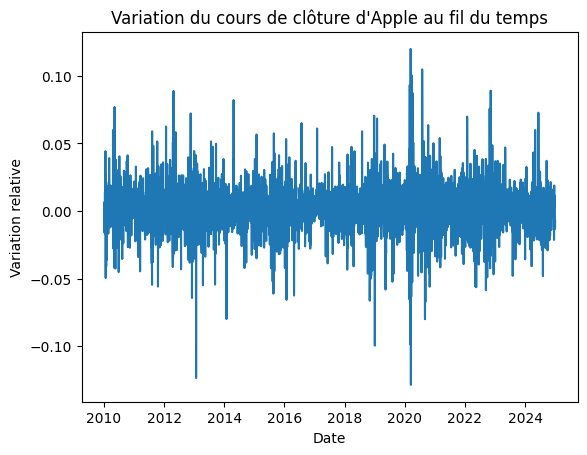

In [9]:
plt.plot(apple_df.index, apple_df["variation"])
plt.title("Variation du cours de clôture d'Apple au fil du temps")
plt.xlabel("Date")
plt.ylabel("Variation relative")
plt.show()

A l'aide de scipy, calculer le z-score associé à cette colonne. Déterminer les journées à variations atypiques à partir de ce score (vous pouvez par exemple par un seuil égal à 5, à 3...).

In [10]:
zscores = zscore(
    apple_df["variation"],
    nan_policy="omit",
)

In [11]:
unusual_apple_df = apple_df[abs(zscores) > 5]
unusual_apple_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,variation
Date,,,,,,,,
2013-01-24 00:00:00-05:00,13.947698,14.121438,13.652066,13.659648,1460852400,0.0,0.0,-0.123558
2019-01-03 00:00:00-05:00,34.297229,34.711713,33.825578,33.870838,365248800,0.0,0.0,-0.099607
2020-03-02 00:00:00-05:00,68.413715,73.057356,67.308548,72.419945,341397200,0.0,0.0,0.093101
2020-03-12 00:00:00-04:00,62.029922,65.437520,60.105574,60.161316,418474000,0.0,0.0,-0.098755
2020-03-13 00:00:00-04:00,64.199052,67.841740,61.305256,67.369133,370732000,0.0,0.0,0.119808
2020-03-16 00:00:00-04:00,58.639285,62.790929,58.166681,58.702301,322423600,0.0,0.0,-0.128647
2020-03-24 00:00:00-04:00,57.284492,60.030445,56.785229,59.834133,287531200,0.0,0.0,0.100325
2020-07-31 00:00:00-04:00,100.011328,103.442730,98.008860,103.292061,374336800,0.0,0.0,0.104689
2022-11-10 00:00:00-05:00,139.433843,144.991837,137.716088,144.991837,118854000,0.0,0.0,0.088974


Visualiser les lignes associées, ainsi que les lignes des journées précédentes.

In [19]:
outlier_mask = abs(zscores) > 5
display_mask = outlier_mask | outlier_mask.shift(-1)
apple_df[display_mask]

AttributeError: 'numpy.ndarray' object has no attribute 'shift'

Calculer les quartiles Q1 et Q3, l'écart inter-quartile IQR, et repérer les points en dehors de la plage [Q1 - 1,5 IQR; Q3 + 1,5 IQR]. Visualiser les lignes associées, ainsi que les lignes des journées précédentes.

In [14]:
q1 = apple_df["variation"].quantile(0.25)
q3 = apple_df["variation"].quantile(0.75)
iqr = q3 - q1
borne_inf = q1 - 1.5 * iqr
borne_sup = q3 + 1.5 * iqr

iqr_outlier_mask = (apple_df["variation"] < borne_inf) | (apple_df["variation"] > borne_sup)
apple_df[iqr_outlier_mask]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,variation
Date,,,,,,,,
2010-01-19 00:00:00-05:00,6.261189,6.467360,6.228430,6.462852,730007600,0.0,0.0,0.044239
2010-01-22 00:00:00-05:00,6.214605,6.236244,5.925484,5.943216,881767600,0.0,0.0,-0.049599
2010-01-28 00:00:00-05:00,6.159004,6.176135,5.971767,5.989498,1173502400,0.0,0.0,-0.041322
2010-01-29 00:00:00-05:00,6.043296,6.076957,5.717809,5.772207,1245952400,0.0,0.0,-0.036279
2010-02-04 00:00:00-05:00,5.912561,5.961850,5.757481,5.771908,757652000,0.0,0.0,-0.036038
...,...,...,...,...,...,...,...,...
2024-04-11 00:00:00-04:00,167.329421,174.406689,167.150509,173.989197,91070300,0.0,0.0,0.043271
2024-05-03 00:00:00-04:00,185.529503,185.877408,181.563465,182.279144,163224100,0.0,0.0,0.059816
2024-06-11 00:00:00-04:00,192.748557,206.195678,192.728661,206.185715,172373300,0.0,0.0,0.072649


Pour le moment, nous n'avons utilisé qu'une seule colonne (celle des prix de clôture). Visualiser la matrice de corrélation des colonnes du dataframe.

In [20]:
apple_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,variation
Date,,,,,,,,
2010-01-04 00:00:00-05:00,6.414465,6.446623,6.382908,6.431897,493729600,0.0,0.0,0.000000
2010-01-05 00:00:00-05:00,6.449629,6.479382,6.409055,6.443017,601904800,0.0,0.0,0.001729
2010-01-06 00:00:00-05:00,6.443016,6.468562,6.333919,6.340531,552160000,0.0,0.0,-0.015906
2010-01-07 00:00:00-05:00,6.363974,6.371488,6.282828,6.328811,477131200,0.0,0.0,-0.001849
2010-01-08 00:00:00-05:00,6.320395,6.371488,6.283129,6.370886,447610800,0.0,0.0,0.006648
...,...,...,...,...,...,...,...,...
2024-12-24 00:00:00-05:00,254.875189,257.588630,254.675658,257.578674,23234700,0.0,0.0,0.011478
2024-12-26 00:00:00-05:00,257.568678,259.474086,257.010028,258.396667,27237100,0.0,0.0,0.003176
2024-12-27 00:00:00-05:00,257.209530,258.077462,252.451019,254.974930,42355300,0.0,0.0,-0.013242


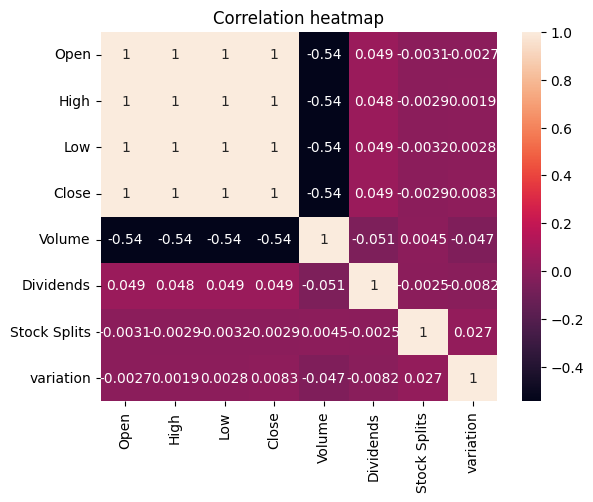

In [21]:
sns.heatmap(apple_df.select_dtypes(include=np.number).corr(), annot=True)
plt.title("Correlation heatmap")
plt.show()

Utilisons certaines de ces colonnes pour réaliser un modèle simple de prédiction. Essayer de réaliser une régression linéaire du cours de clôture à partir de colonnes que vous jugez pertinentes.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = apple_df.drop(columns=["Close"])
y = apple_df["Close"]

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=11)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model.coef_

array([-4.69824862e-01,  7.38033570e-01,  7.32057472e-01,  6.39350627e-11,
        5.74818804e-01, -9.64399076e-02,  1.35779820e+01])

In [ ]:
y_pred = lr_model.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.27930746801579
0.9999368108749597


Est-il possible de faire une prédiction du cours de clôture pour aujourd'hui ? Critiquer la regression linéaire pour cette application.

Bonus 1 : s'il vous reste du temps, essayer de réaliser une ARIMA sur le cours de clôture.

In [25]:
model_arima = sm.tsa.ARIMA(apple_df["Close"]).fit()
print(model_arima.summary())

c:\Users\orsys\formation-install-minimale\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\orsys\formation-install-minimale\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\orsys\formation-install-minimale\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3774
Model:                          ARIMA   Log Likelihood              -21138.597
Date:                Fri, 11 Jul 2025   AIC                          42281.193
Time:                        14:53:43   BIC                          42293.665
Sample:                             0   HQIC                         42285.627
                               - 3774                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.4333      1.756     38.395      0.000      63.991      70.876
sigma2      4290.3482    180.707     23.742      0.000    3936.169    4644.528
Ljung-Box (L1) (Q):                3766.19   Jarque-

Bonus 2 : créer une table dans une base de données sqlite3 avec la date et le cours de clôture. Prévoir un upsert (insert/update) pour le cas où l'export traité n'est pas le premier.

In [ ]:
# Votre code ici